# Importation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.collections import LineCollection
import seaborn as sns
import re 
from math import sqrt
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pip
from IPython.display import IFrame
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

[nltk_data] Downloading package stopwords to /home/sarah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sarah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sarah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/home/sarah/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [3]:
products= pd.read_csv('products.csv', delimiter='\t',  encoding='utf-8')

# ETAPE 1: Traitement des données

In [4]:
#On affiche un aperçu de notre jeu de données
products.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#On affiche la taille de nos données
print(products.shape)

(320772, 162)


In [6]:
#On affiche le type de nos données
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


# On s'intéresse d'abord aux variables qualitatives

In [7]:
# Sélectionner les colonnes qualitatives
qualitative_columns = products.select_dtypes(include='object')
# Calculer le nombre de valeurs uniques pour chaque colonne
unique_values = qualitative_columns.nunique()
# Afficher le résultat
print("Nombre de valeurs uniques pour chaque colonne catégorielle :")
unique_values

Nombre de valeurs uniques pour chaque colonne catégorielle :


code                                          320638
url                                           320749
creator                                         3535
created_t                                     189636
created_datetime                              189568
last_modified_t                               180639
last_modified_datetime                        180495
product_name                                  221347
generic_name                                   38584
quantity                                       13826
packaging                                      14547
packaging_tags                                 12064
brands                                         58784
brands_tags                                    50253
categories                                     36982
categories_tags                                21142
categories_fr                                  21152
origins                                         4840
origins_tags                                  

In [8]:
# Calculer le nombre de valeurs manquantes pour chaque colonne
missing_values = qualitative_columns.isnull().sum()
# Afficher le résultat
print("Nombre de valeurs manquantes pour chaque colonne :")
missing_values

Nombre de valeurs manquantes pour chaque colonne :


code                                              23
url                                               23
creator                                            2
created_t                                          3
created_datetime                                   9
last_modified_t                                    0
last_modified_datetime                             0
product_name                                   17762
generic_name                                  267977
quantity                                      215953
packaging                                     241812
packaging_tags                                241811
brands                                         28412
brands_tags                                    28420
categories                                    236362
categories_tags                               236383
categories_fr                                 236361
origins                                       298582
origins_tags                                  

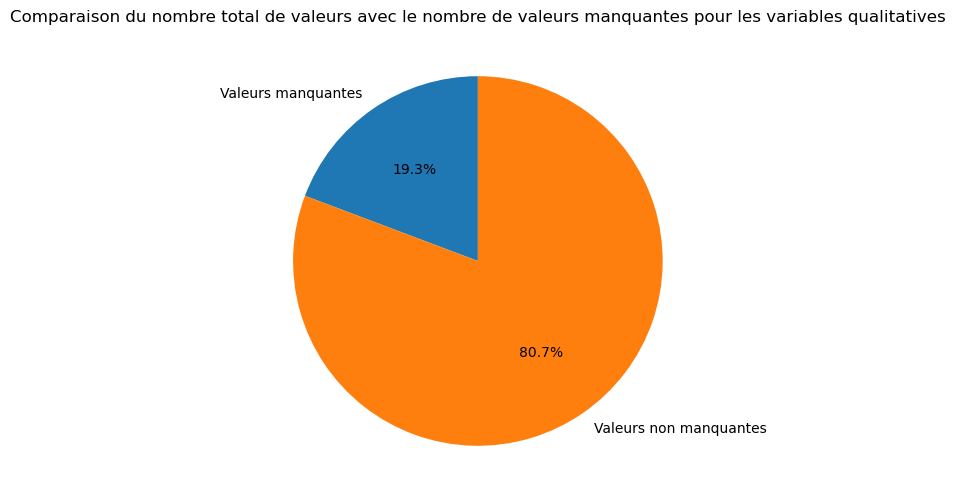

In [9]:
#Création des variables pour le camembert
total_values = products.size
# Calculer le nombre total de valeurs manquantes
total_missing = qualitative_columns.isnull().sum().sum()
# Créer les labels pour le diagramme
labels = ['Valeurs manquantes', 'Valeurs non manquantes']
# Créer les valeurs pour le diagramme
values = [total_missing, total_values - total_missing]
# Créer le diagramme camembert
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
# Ajouter un titre au diagramme
plt.title("Comparaison du nombre total de valeurs avec le nombre de valeurs manquantes pour les variables qualitatives")
# Afficher le diagramme
plt.show()

<AxesSubplot:>

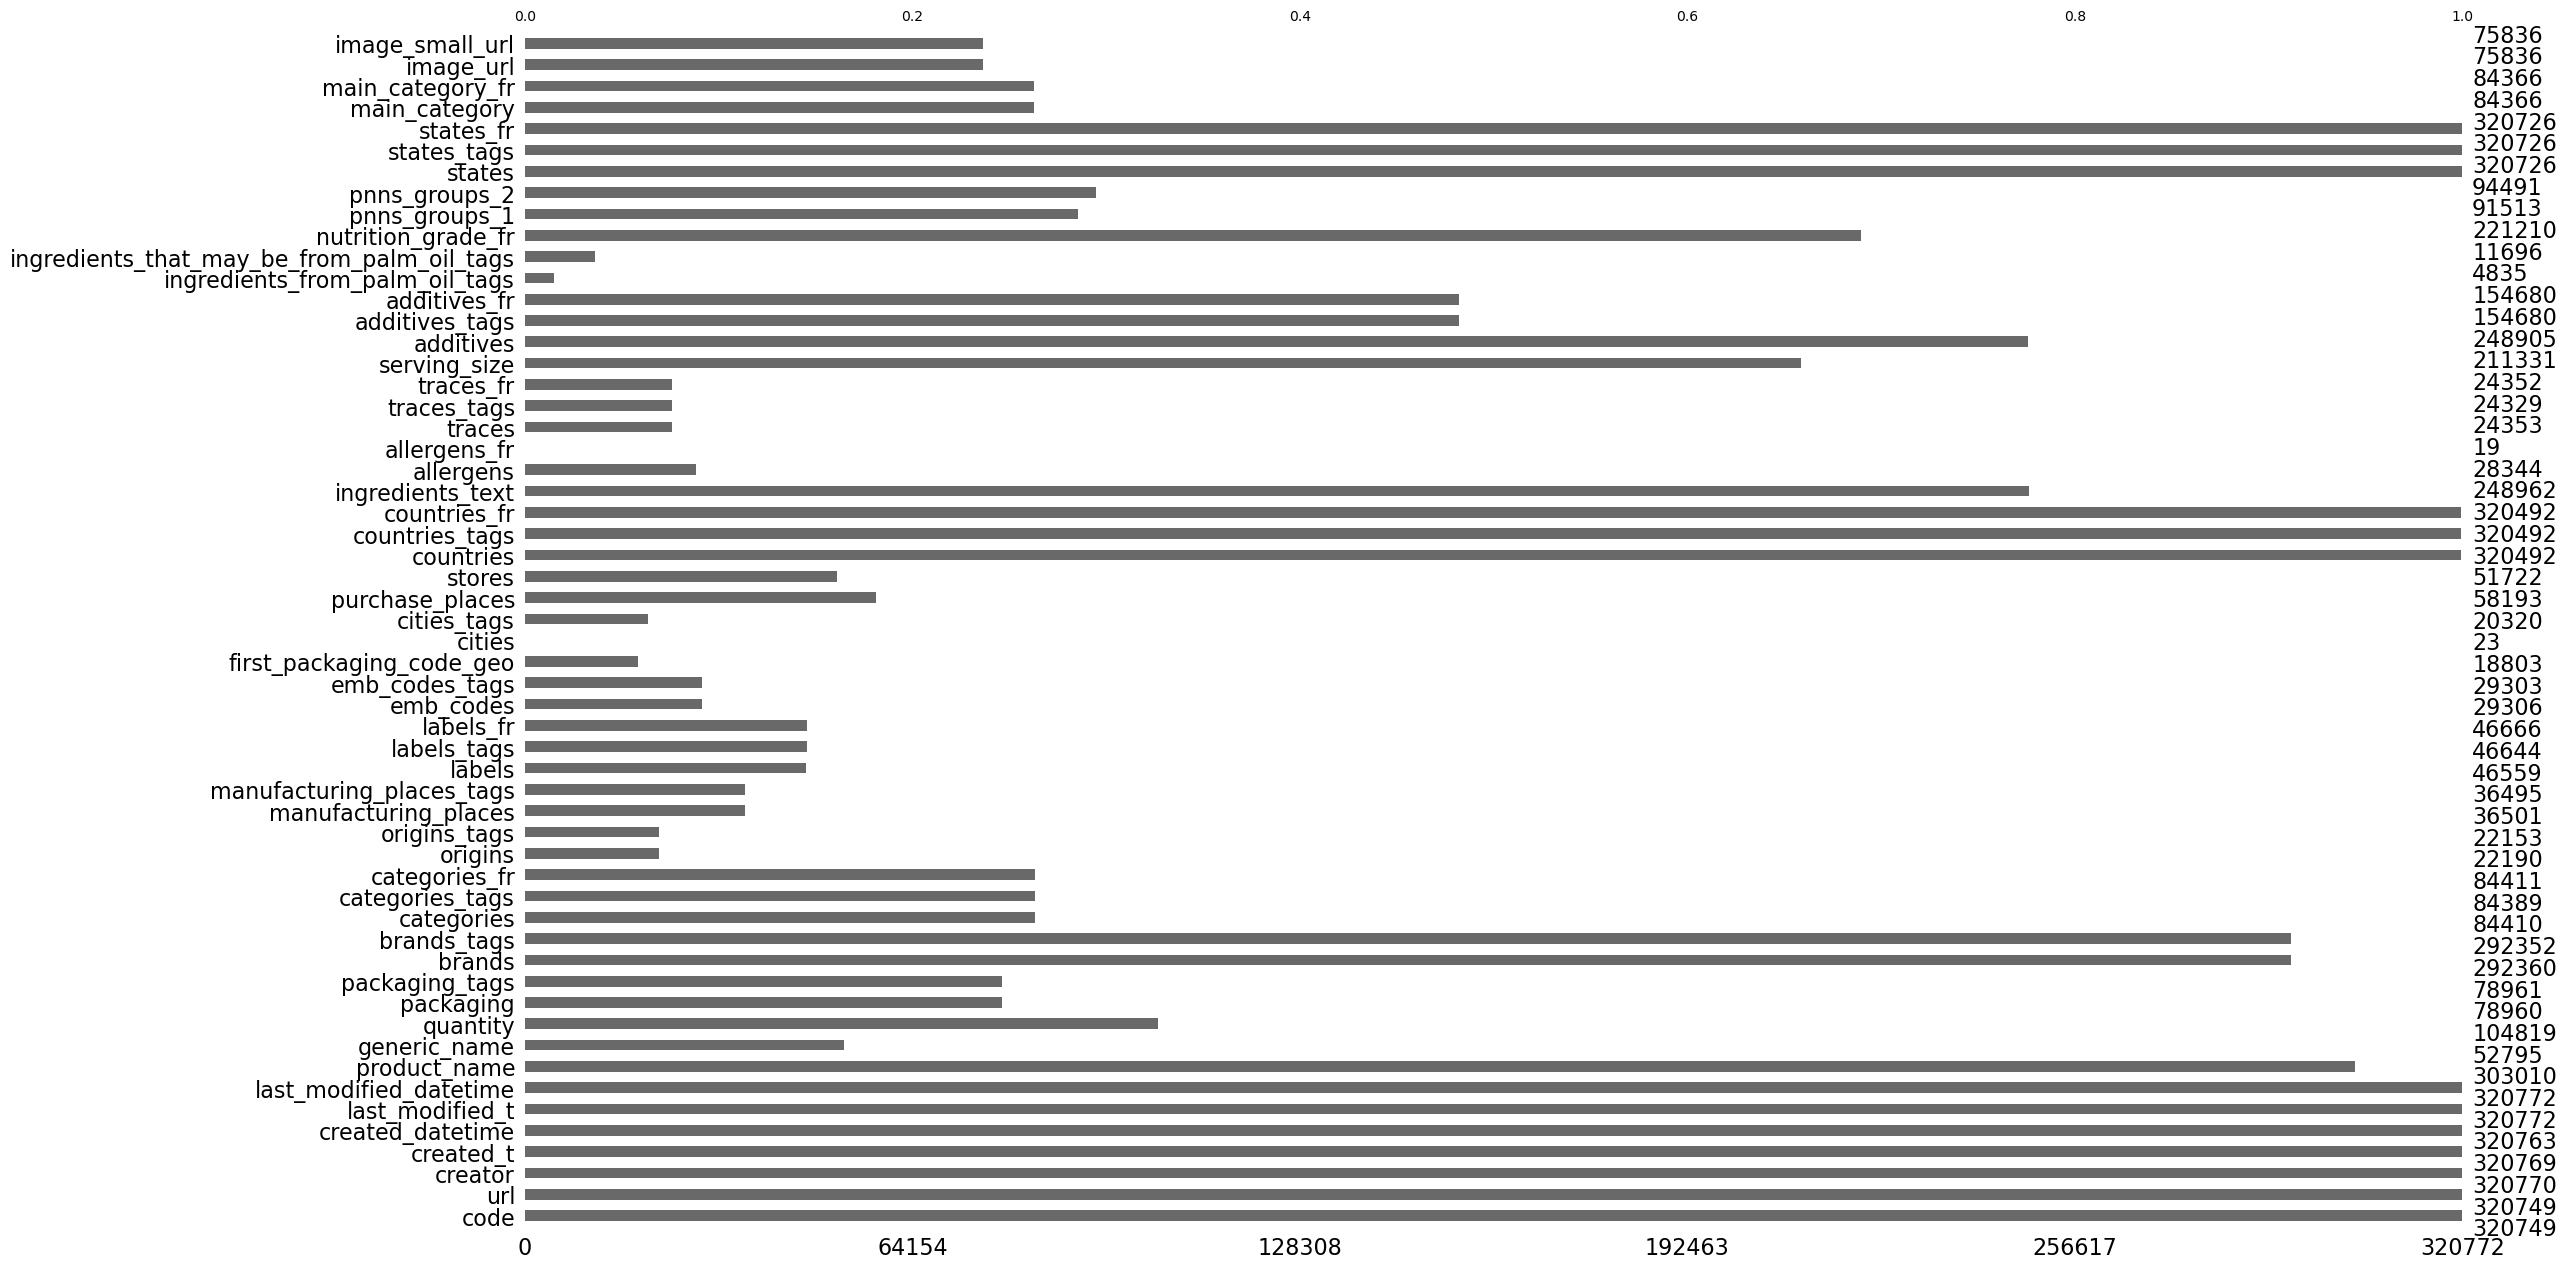

In [10]:
msno.bar(qualitative_columns)

# Puis on s'intéresse aux variables quantitatives

In [11]:
# Sélectionner les colonnes quantitatives
quantitative_columns = products.select_dtypes(include='float64')
# Calculer le nombre de valeurs uniques pour chaque colonne
unique_values = quantitative_columns.nunique()
# Afficher le résultat
print("Nombre de valeurs uniques pour chaque colonne quantitative :")
print(unique_values)

Nombre de valeurs uniques pour chaque colonne quantitative :
no_nutriments                                0
additives_n                                 31
ingredients_from_palm_oil_n                  3
ingredients_from_palm_oil                    0
ingredients_that_may_be_from_palm_oil_n      7
                                          ... 
carbon-footprint_100g                      202
nutrition-score-fr_100g                     55
nutrition-score-uk_100g                     55
glycemic-index_100g                          0
water-hardness_100g                          0
Length: 106, dtype: int64


In [12]:
# Calculer le nombre de valeurs manquantes pour chaque colonne
missing_values_quant = quantitative_columns.isnull().sum()
# Afficher le résultat
print("Nombre de valeurs manquantes pour chaque colonne :")
print(missing_values_quant)

Nombre de valeurs manquantes pour chaque colonne :
no_nutriments                              320772
additives_n                                 71833
ingredients_from_palm_oil_n                 71833
ingredients_from_palm_oil                  320772
ingredients_that_may_be_from_palm_oil_n     71833
                                            ...  
carbon-footprint_100g                      320504
nutrition-score-fr_100g                     99562
nutrition-score-uk_100g                     99562
glycemic-index_100g                        320772
water-hardness_100g                        320772
Length: 106, dtype: int64


In [13]:
#Création des variables pour le camembert
total_values = products.size
# Calculer le nombre total de valeurs manquantes
total_missing_quant = quantitative_columns.isnull().sum().sum()

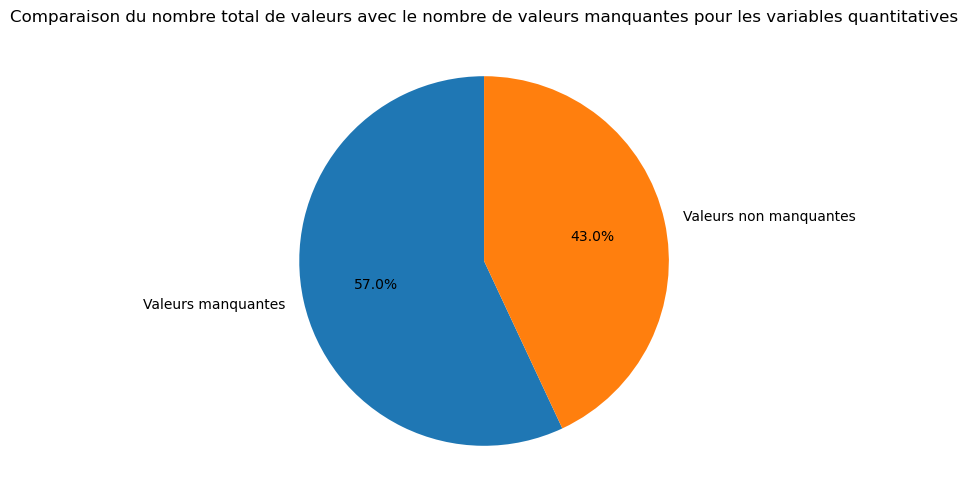

In [14]:
# Créer les labels pour le diagramme
labels = ['Valeurs manquantes', 'Valeurs non manquantes']
# Créer les valeurs pour le diagramme
values = [total_missing_quant, total_values - total_missing_quant]
# Créer le diagramme camembert
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
# Ajouter un titre au diagramme
plt.title("Comparaison du nombre total de valeurs avec le nombre de valeurs manquantes pour les variables quantitatives")
# Afficher le diagramme
plt.show()

<AxesSubplot:>

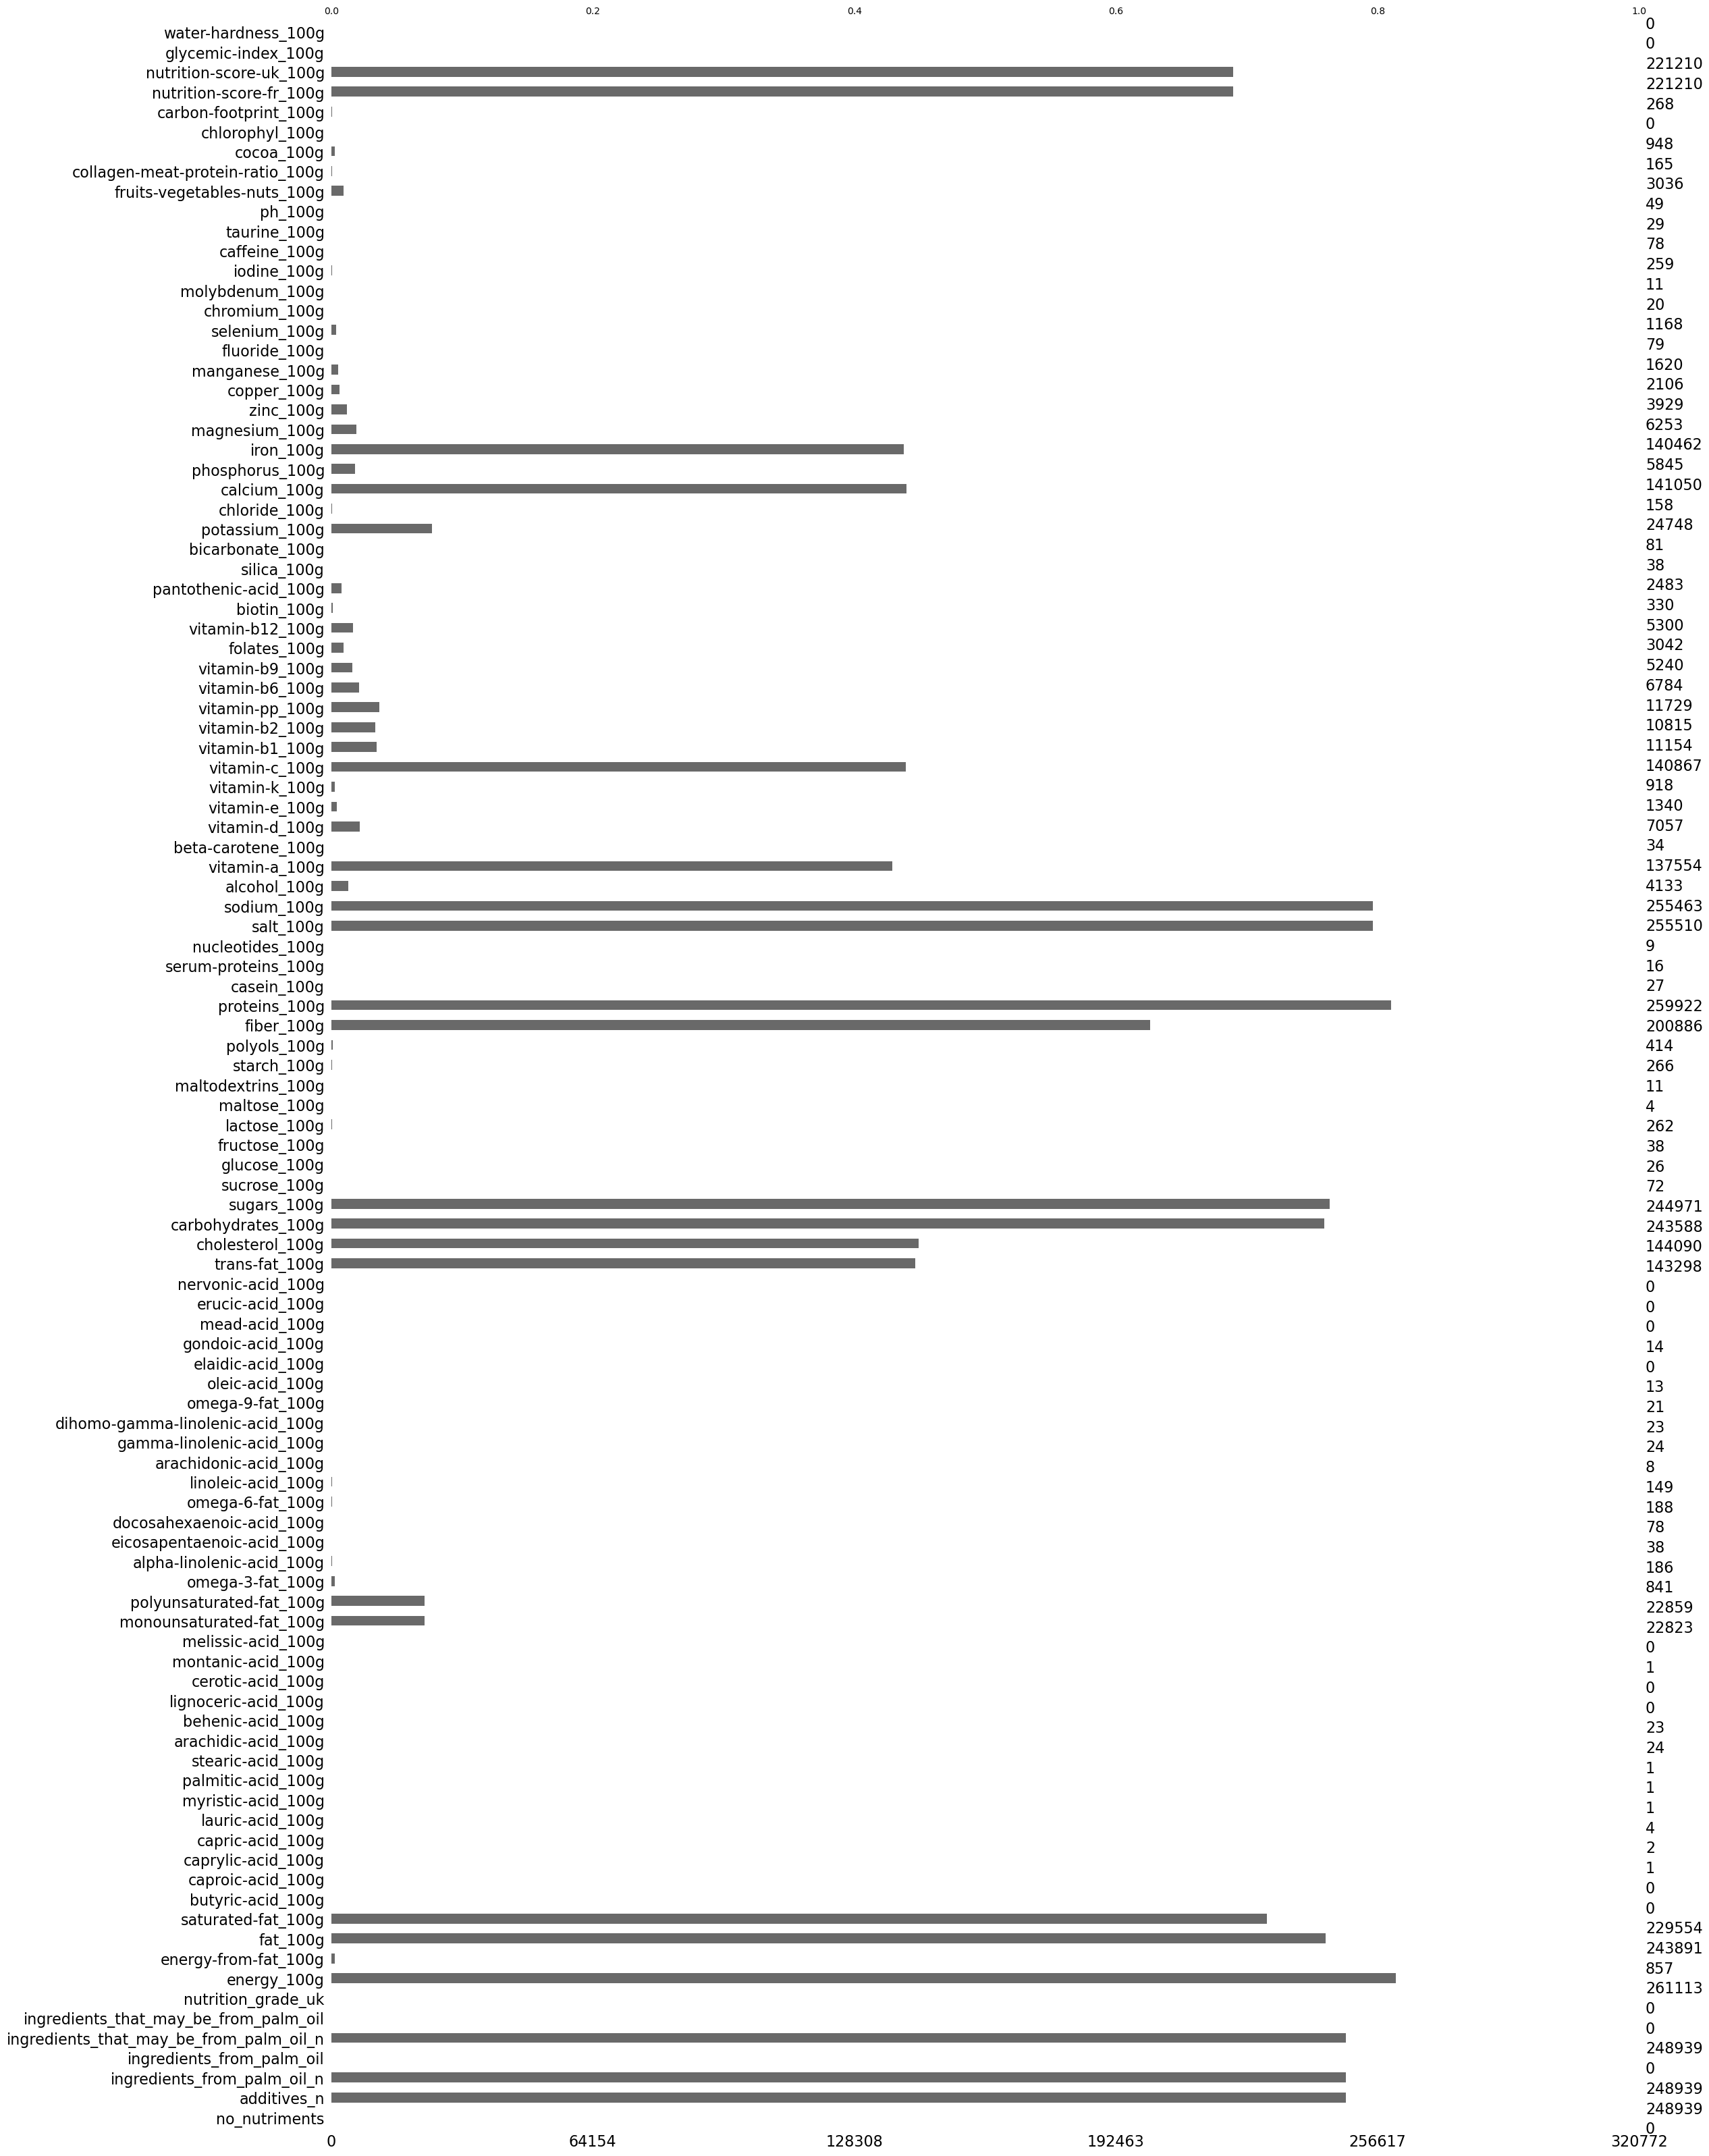

In [15]:
msno.bar(quantitative_columns)

# Nettoyage du jeu de données

On va tout d'abord filtrer les pays sur la France

In [16]:
# Filtrer les données pour le pays "France"
products = products[products['countries'] == 'France']

On supprime les produits sans nom

In [17]:
products = products.dropna(subset=['product_name'])

In [18]:
# Supprimer les doublons en se basant sur la colonne 'code'
products = products.drop_duplicates(subset=['code'])
products.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,39259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,5200016,http://world-fr.openfoodfacts.org/produit/0000...,sigoise,1441186657,2015-09-02T09:37:37Z,1442570752,2015-09-18T10:05:52Z,lentilles vertes,NaN,1 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,7730009,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1462806432,2016-05-09T15:07:12Z,1482359150,2016-12-21T22:25:50Z,Biscuits sablés fourrage au cacao,Biscuits sablés déclassés fourrage au cacao,1 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,10090206,http://world-fr.openfoodfacts.org/produit/0000...,sebleouf,1370977431,2013-06-11T19:03:51Z,1445083431,2015-10-17T12:03:51Z,Thé de Noël aromatisé orange-cannelle,NaN,75 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#On supprime les variables qui ne sont pas interessantes
products = products.drop(columns=['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','additives_n','created_t','last_modified_t','brands_tags','packaging','packaging_tags','url','creator','created_datetime','last_modified_datetime','categories_tags','categories_fr','countries_tags','countries_fr','ingredients_text','countries','additives','pnns_groups_2','states','states_tags','states_fr','main_category','main_category_fr','brands','purchase_places','image_url','image_small_url',      
'generic_name','quantity','categories','labels','labels_tags','labels_fr','stores'   ], errors='ignore')

In [20]:
# Calculer le nombre total de valeurs manquantes pour les données sélectionnées
total_values_selection = len(products)
missing_values_selection = products.isnull().sum()
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
percentage_missing_selection = (missing_values_selection / total_values_selection) * 100
# Afficher les pourcentages de valeurs manquantes
print(percentage_missing_selection)

code                         0.000000
product_name                 0.000000
origins                     80.955389
origins_tags                80.963285
manufacturing_places        67.848401
                              ...    
carbon-footprint_100g       99.777602
nutrition-score-fr_100g     23.507040
nutrition-score-uk_100g     23.507040
glycemic-index_100g        100.000000
water-hardness_100g        100.000000
Length: 126, dtype: float64


In [21]:
# Utiliser les valeurs calculées précédemment
percentage_missing_selection = (missing_values_selection / total_values_selection) * 100

# Filtrer sur les variables avec moins de 50% de valeurs manquantes
variables_a_conserver = percentage_missing_selection[percentage_missing_selection < 50]


In [22]:
products_filtres = products[variables_a_conserver.index]
variables_a_conserver.index

Index(['code', 'product_name', 'nutrition_grade_fr', 'pnns_groups_1',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

<AxesSubplot:>

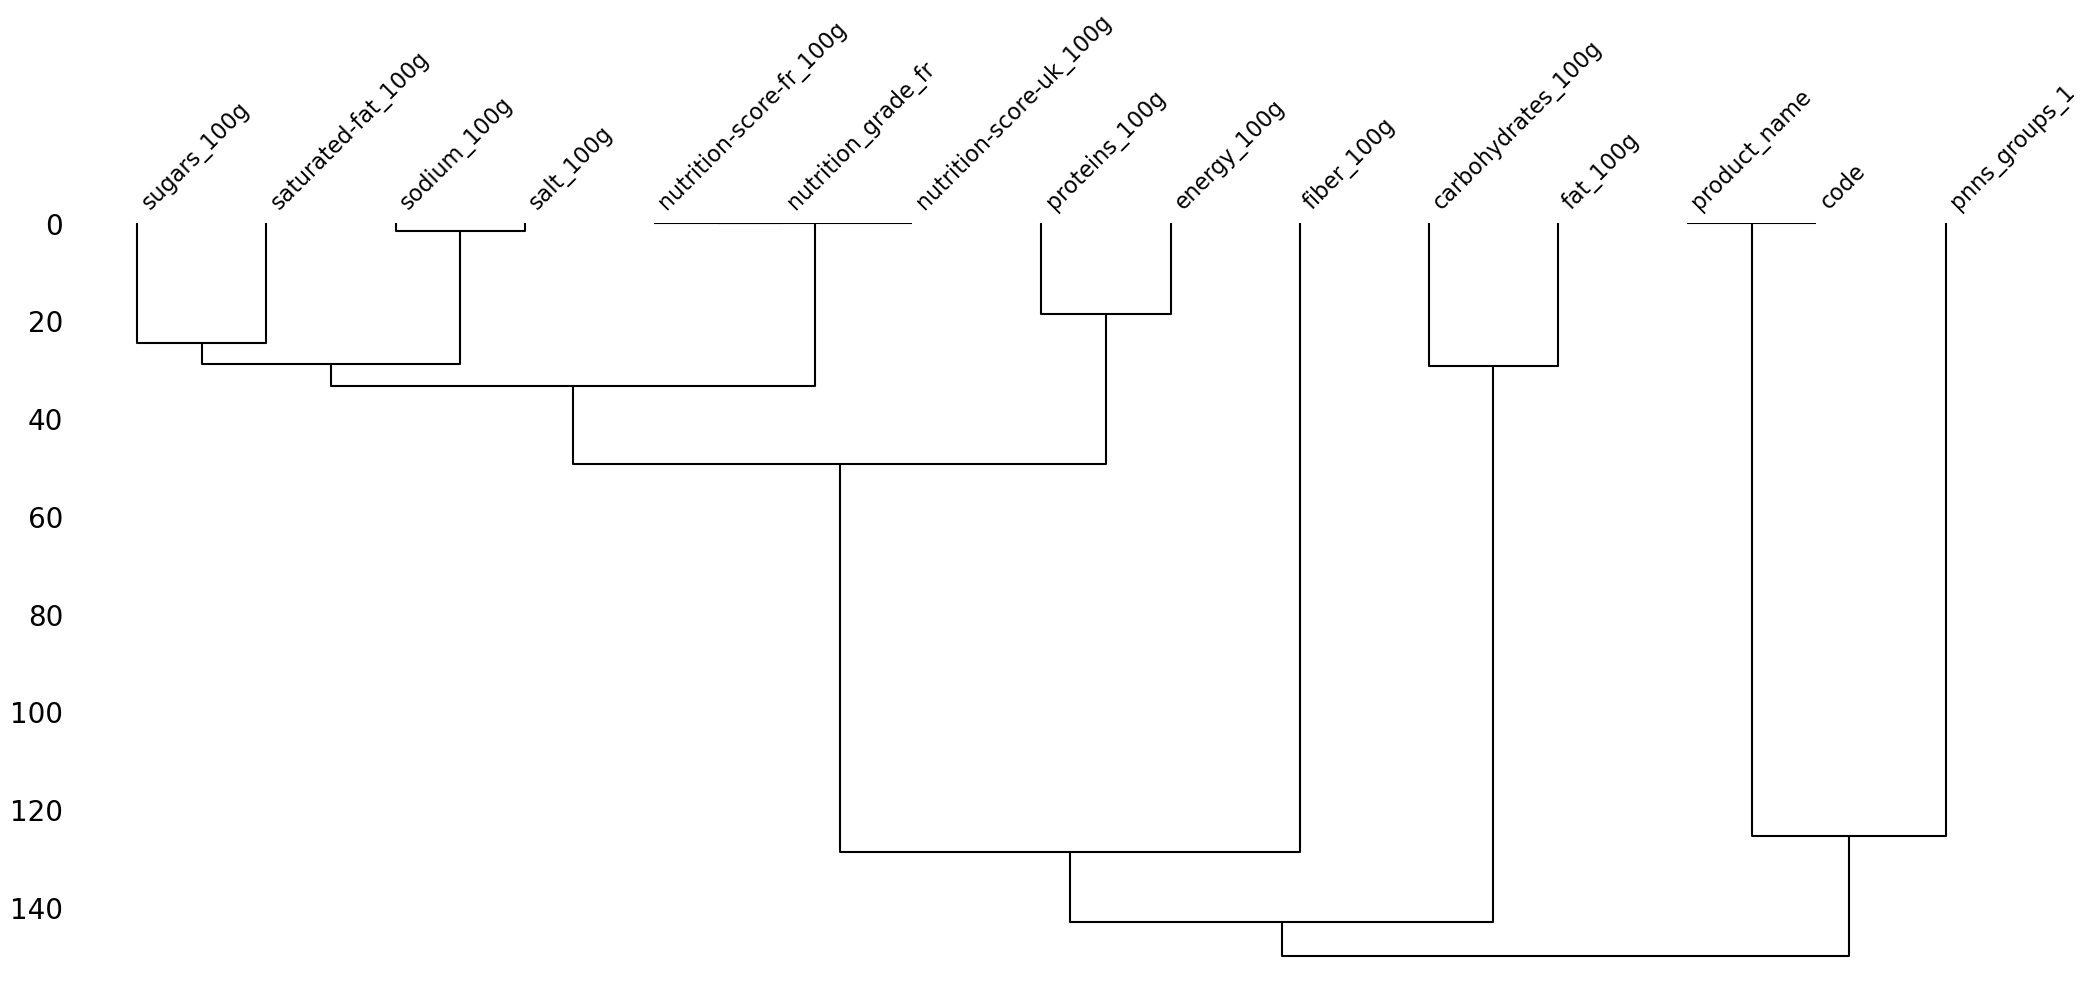

In [23]:
msno.dendrogram(products_filtres)

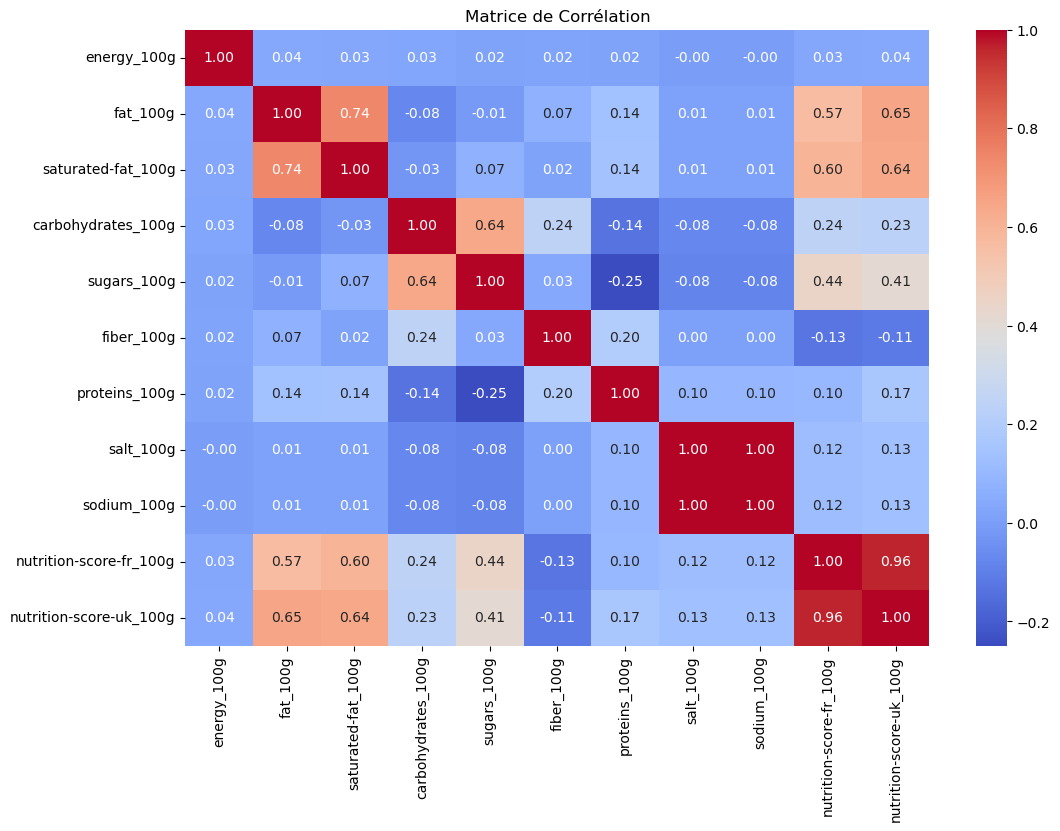

In [24]:
# Calculer la matrice de corrélation
correlation_matrix = products_filtres.corr()
# Mettre en place une figure
plt.figure(figsize=(12, 8))
# Créer une heatmap de la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
# Afficher la figure
plt.show()

In [25]:
products_filtres

,code,product_name,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
46,24600,Filet de bœuf,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,39259,Twix x2,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,5200016,lentilles vertes,NaN,Cereals and potatoes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,7730009,Biscuits sablés fourrage au cacao,NaN,Sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,10090206,Thé de Noël aromatisé orange-cannelle,NaN,Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320757,9900000000233,Amandes,b,NaN,2406.0,NaN,3.73,NaN,3.89,12.2,21.22,0.1000,0.03937,0.0,0.0
320758,9900010011557,Miel de Camargue,NaN,Sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320761,9906410000009,Roussette du Bugey (2011),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,Thé vert Earl grey,c,Beverages,21.0,0.2,0.20,0.5,0.50,0.2,0.50,0.0254,0.01000,2.0,0.0


In [26]:
#On supprime les variables qui sont très corrélés et qui n'apportent pas plus a nos analyses
# Supprimer la colonne 'nutrition-score-uk_100g' de products_selection
products_selection = products_filtres.drop(columns=['nutrition-score-uk_100g'], errors='ignore')

# Etape 2 : Valeurs manquantes

In [27]:
# Calculer le nombre total de valeurs pour les données sélectionnées
total_values_selection = len(products_selection)
missing_values_selection = products_selection.isnull().sum()
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
percentage_missing_selection = (missing_values_selection / total_values_selection) * 100
# Afficher les pourcentages de valeurs manquantes
print(percentage_missing_selection)

code                        0.000000
product_name                0.000000
nutrition_grade_fr         23.507040
pnns_groups_1              20.719832
energy_100g                19.685485
fat_100g                   41.825240
saturated-fat_100g         22.348993
carbohydrates_100g         42.370049
sugars_100g                22.231873
fiber_100g                 42.878010
proteins_100g              20.014476
salt_100g                  22.148967
sodium_100g                22.152915
nutrition-score-fr_100g    23.507040
dtype: float64


# Imputations par le mode pour les variables qualitatives

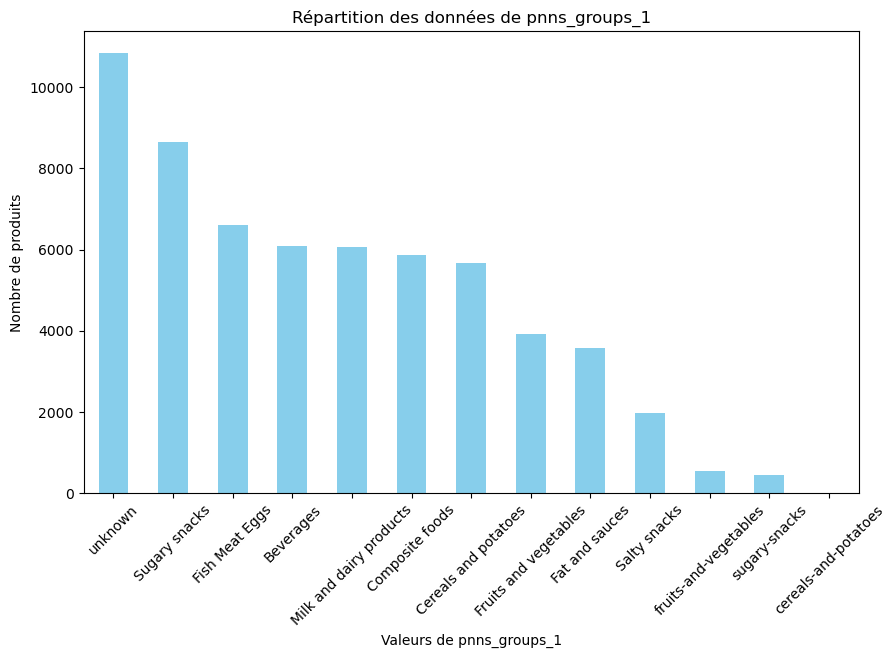

In [28]:
# Grouper les données par genre et compter le nombre d'occurrences
genre_counts = products_selection['pnns_groups_1'].value_counts()
# Ré-afficher le graphique à barres mis à jour
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition des données de pnns_groups_1')
plt.xlabel('Valeurs de pnns_groups_1')
plt.ylabel('Nombre de produits')
plt.xticks(rotation=45)
plt.show()

In [29]:
#On remplace la valeur unknown par nan
products_selection["pnns_groups_1"] = products_selection["pnns_groups_1"].replace("unknown", np.nan)

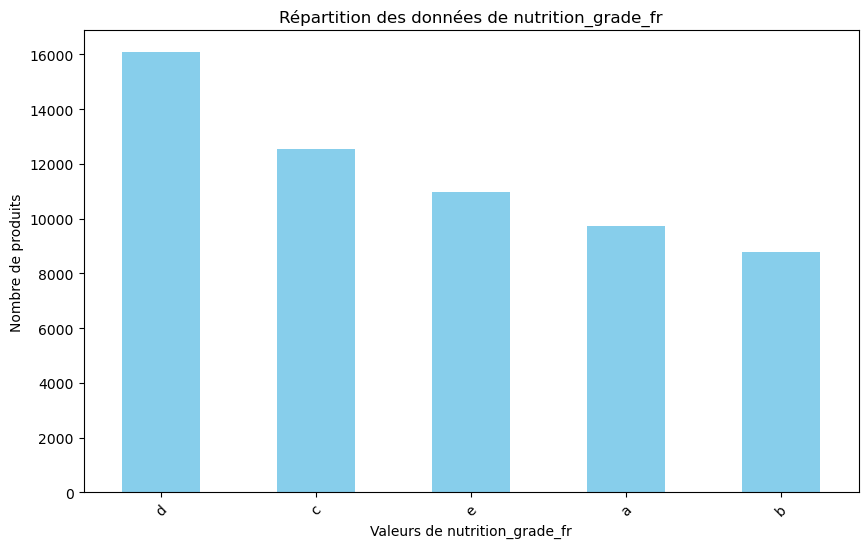

In [30]:
# Grouper les données par genre et compter le nombre d'occurrences
genre_counts = products_selection['nutrition_grade_fr'].value_counts()
# Ré-afficher le graphique à barres mis à jour
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition des données de nutrition_grade_fr')
plt.xlabel('Valeurs de nutrition_grade_fr')
plt.ylabel('Nombre de produits')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Sélection des variables qualitatives des deux groupes
qualitative_vars = products_selection[['pnns_groups_1', 'nutrition_grade_fr']]

# Imputation pour les variables qualitatives
qual_imputer = SimpleImputer(strategy='most_frequent')
qualitative_vars_imputed = qual_imputer.fit_transform(qualitative_vars)

# Convertir le résultat en DataFrame
qualitative_vars_imputed_df = pd.DataFrame(qualitative_vars_imputed, columns=qualitative_vars.columns)

# Réinitialiser les index
qualitative_vars_imputed_df.reset_index(drop=True, inplace=True)
products_selection.reset_index(drop=True, inplace=True)

# Mise à jour le DataFrame avec les valeurs imputées
products_selection.update(qualitative_vars_imputed_df)

# Vérifier le pourcentage de valeurs manquantes
print(products_selection.isnull().mean() * 100)

code                        0.000000
product_name                0.000000
nutrition_grade_fr          0.000000
pnns_groups_1               0.000000
energy_100g                19.685485
fat_100g                   41.825240
saturated-fat_100g         22.348993
carbohydrates_100g         42.370049
sugars_100g                22.231873
fiber_100g                 42.878010
proteins_100g              20.014476
salt_100g                  22.148967
sodium_100g                22.152915
nutrition-score-fr_100g    23.507040
dtype: float64


# Imputation pour les variables quantitatives

In [32]:
#Selection des variables
variables = ['energy_100g', 'saturated-fat_100g','fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','nutrition-score-fr_100g', 'salt_100g', 'sodium_100g' ]

Selection d'un sous ensemble afin de reduire le temps de calcul

In [33]:
# Sélection dun sous-ensemble de 5% des données
data_subset = products_selection.sample(frac=0.05, random_state=42)

# Diviser les données en ensemble d'entraînement et de test
train, test = train_test_split(data_subset, test_size=0.2, random_state=42)

**Comparatifs des de l'imputation par KNN par rapport a IterativeImputer sur nos variables quantitatives :**

In [34]:
# Création d'un DataFrame pour stocker les résultats
results = pd.DataFrame(columns=['Variable', 'Méthode', 'Erreur', 'Pourcentage d\'erreur'])

In [35]:
# Calcul de l'erreur de prédiction pour chaque méthode d'imputation
for target in variables:
    # Sélectionner les autres variables comme variables explicatives
    features = [col for col in variables if col != target]

    # Suppressionm les lignes avec des valeurs manquantes dans la colonne cible
    train_target = train.dropna(subset=[target])
    test_target = test.dropna(subset=[target])

    for method in ['KNN', 'IterativeImputer']:
        if method == 'KNN':
            imputer = KNNImputer(n_neighbors=3)
        elif method == 'IterativeImputer':
            imputer = IterativeImputer(estimator=LinearRegression())
        
        # Imputer les valeurs manquantes
        train_imputed = imputer.fit_transform(train_target[features])
        test_imputed = imputer.transform(test_target[features])
        
        # Entraîner le modèle sur les données imputées
        model = LinearRegression()
        model.fit(train_imputed, train_target[target])
        
        # Prédire la variable cible sur l'ensemble de test
        predictions = model.predict(test_imputed)
        
        # Calcul de  l'erreur de prédiction
        error = mean_squared_error(test_target[target], predictions)
        
        # Calcul de l'erreur en pourcentage
        range_target = test_target[target].max() - test_target[target].min()
        percent_error = error / range_target * 100
        
        # Ajout des résultats au DataFrame
        results = results.append({'Variable': target, 'Méthode': method, 'Erreur': error, 'Pourcentage d\'erreur': percent_error}, ignore_index=True)

# Afficher les résultats
results

,Variable,Méthode,Erreur,Pourcentage d'erreur
0,energy_100g,KNN,1.776218e+05,4.463980e+03
1,energy_100g,IterativeImputer,1.384770e+05,3.480195e+03
2,saturated-fat_100g,KNN,2.098875e+01,3.682237e+01
3,saturated-fat_100g,IterativeImputer,2.141802e+01,3.757547e+01
4,fat_100g,KNN,2.005131e+01,2.005131e+01
5,fat_100g,IterativeImputer,2.057788e+01,2.057788e+01
6,carbohydrates_100g,KNN,3.865702e+01,3.904750e+01
7,carbohydrates_100g,IterativeImputer,4.349909e+01,4.393847e+01
8,sugars_100g,KNN,1.825673e+02,1.825673e+02
9,sugars_100g,IterativeImputer,1.855298e+02,1.855298e+02


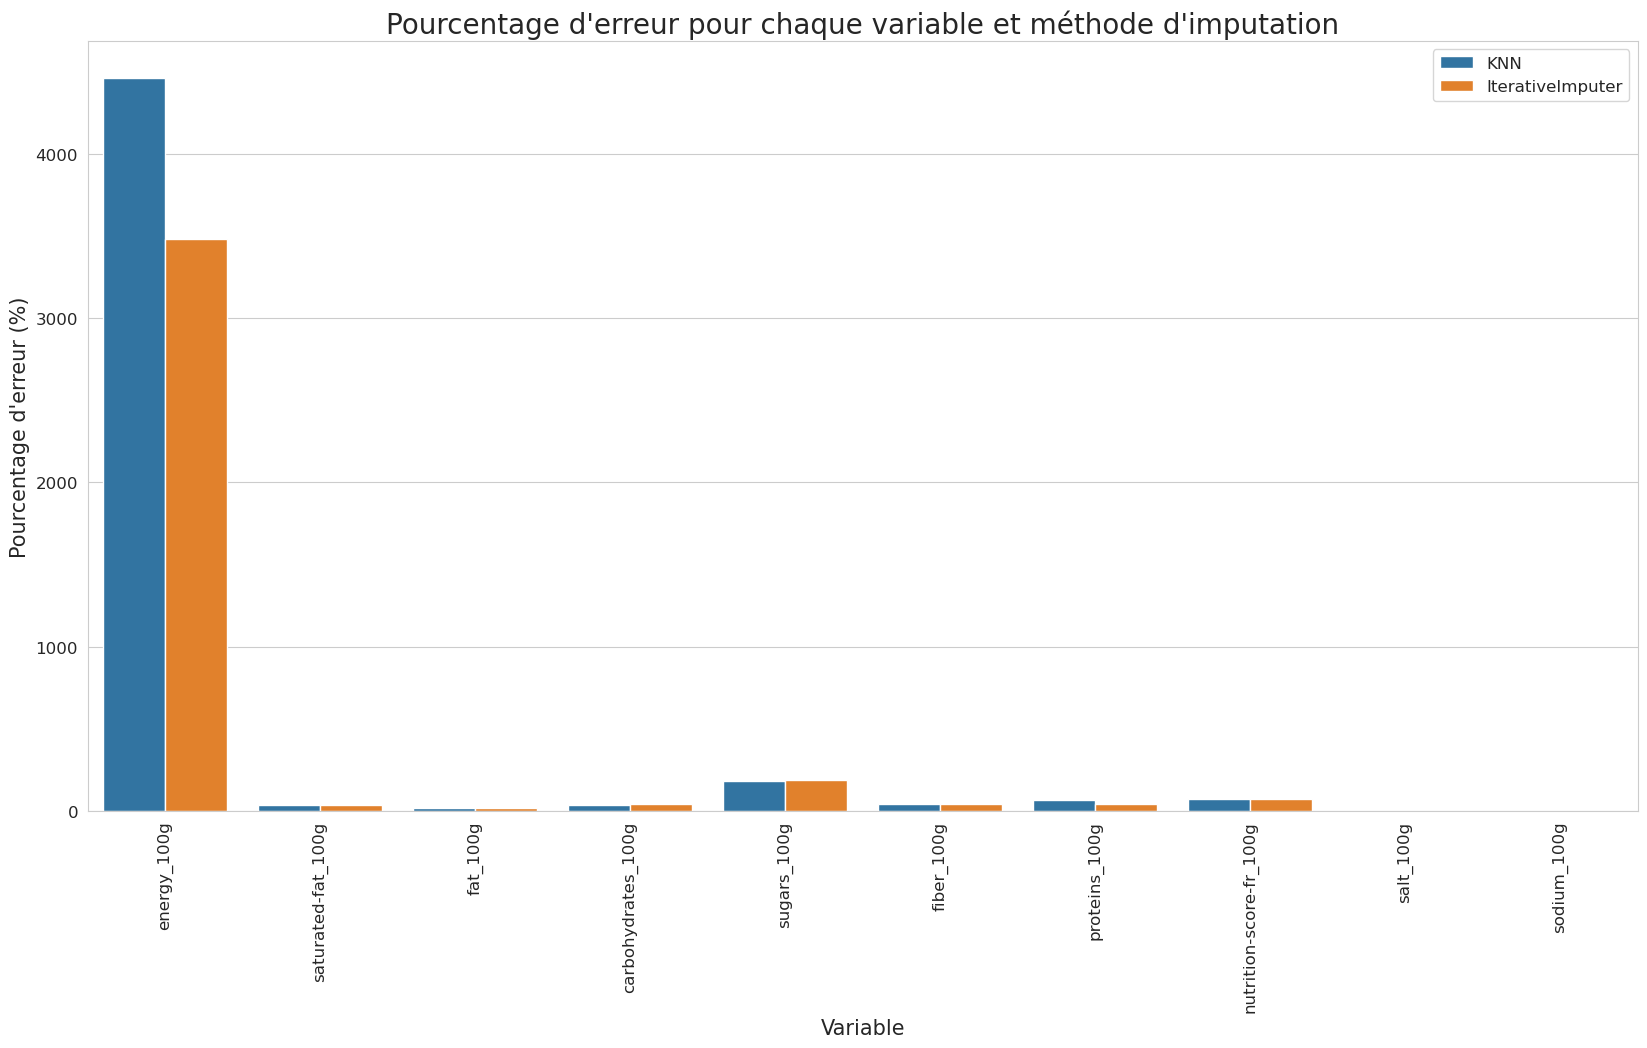

In [36]:
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid") 
sns.barplot(x='Variable', y='Pourcentage d\'erreur', hue='Méthode', data=results)
plt.title('Pourcentage d\'erreur pour chaque variable et méthode d\'imputation', fontsize=20) 
plt.xlabel('Variable', fontsize=15) 
plt.ylabel('Pourcentage d\'erreur (%)', fontsize=15) 
plt.xticks(rotation=90, fontsize=12) 
plt.yticks(fontsize=12)  
plt.legend(fontsize=12) 
plt.show()

On impute pour chaque variable avec la méthode qui lui est la plus efficace

In [37]:
# Liste des variables pour le knn
knn_variables = ['fat_100g','carbohydrates_100g', 'sugars_100g', 'salt_100g', 'sodium_100g']

In [38]:
# Création d'un sous-ensemble de DataFrame avec 5% des données
subset_products_data = products_selection.sample(frac=0.05, random_state=1)

In [39]:
# Instanciation de l'imputeur KNN avec 3 voisins
imputer = KNNImputer(n_neighbors=3)

# Liste des colonnes à imputer avec KNN
columns_to_impute = knn_variables

# Imputation des valeurs manquantes avec KNN
for column in columns_to_impute:
    # Utiliser fit_transform pour imputer les valeurs manquantes
    imputed_column = imputer.fit_transform(subset_products_data[[column]].values)
    
    # Assigner la série imputée à la colonne correspondante dans le DataFrame
    subset_products_data[column] = imputed_column

# Vérification du pourcentage de valeurs manquantes restantes
print(subset_products_data.isnull().mean())

code                       0.000000
product_name               0.000000
nutrition_grade_fr         0.000000
pnns_groups_1              0.000000
energy_100g                0.187368
fat_100g                   0.000000
saturated-fat_100g         0.216842
carbohydrates_100g         0.000000
sugars_100g                0.000000
fiber_100g                 0.421842
proteins_100g              0.191579
salt_100g                  0.000000
sodium_100g                0.000000
nutrition-score-fr_100g    0.230526
dtype: float64


In [40]:
# Liste des variables pour l Iterative Imputer
IterativeImputer_variables = ['saturated-fat_100g','energy_100g', 'fiber_100g', 'proteins_100g','nutrition-score-fr_100g']

In [41]:
# Instanciation de l'IterativeImputer
imputer = IterativeImputer(random_state=0)

# Liste des colonnes à imputer avec IterativeImputer
columns_to_impute = IterativeImputer_variables

In [42]:
# Imputation des valeurs manquantes avec IterativeImputer
for column in columns_to_impute:
    # Utiliser fit_transform pour imputer les valeurs manquantes
    imputed_column = imputer.fit_transform(subset_products_data[[column]].values)
    
    # Assigner la série imputée à la colonne correspondante dans le DataFrame
    subset_products_data[column] = imputed_column

# Vérification du pourcentage de valeurs manquantes restantes
print(subset_products_data.isnull().mean())

code                       0.0
product_name               0.0
nutrition_grade_fr         0.0
pnns_groups_1              0.0
energy_100g                0.0
fat_100g                   0.0
saturated-fat_100g         0.0
carbohydrates_100g         0.0
sugars_100g                0.0
fiber_100g                 0.0
proteins_100g              0.0
salt_100g                  0.0
sodium_100g                0.0
nutrition-score-fr_100g    0.0
dtype: float64


# ETAPE 3: Analyse des outliers, valeurs abberantes

In [43]:
#Aperçu des valeurs abberantes
subset_products_data.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1090.155709,13.321027,5.365748,27.203713,13.215154,2.669168,7.691334,1.201317,0.472955,8.414159
std,694.795178,12.882551,7.646617,20.659648,16.679210,4.026199,6.834209,3.741070,1.472859,7.898665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.000000
25%,515.000000,4.500000,0.500000,11.200000,1.700000,1.000000,2.800000,0.120000,0.047233,2.000000
50%,1090.155709,13.321027,3.700000,27.203713,10.000000,2.669168,7.600000,0.945000,0.372047,8.414159
75%,1506.500000,13.321027,5.365748,27.203713,13.215154,2.669168,9.000000,1.201317,0.472955,13.000000
max,5732.000000,105.000000,95.000000,100.000000,100.000000,100.000000,84.200000,93.600000,36.850394,32.000000


<AxesSubplot:>

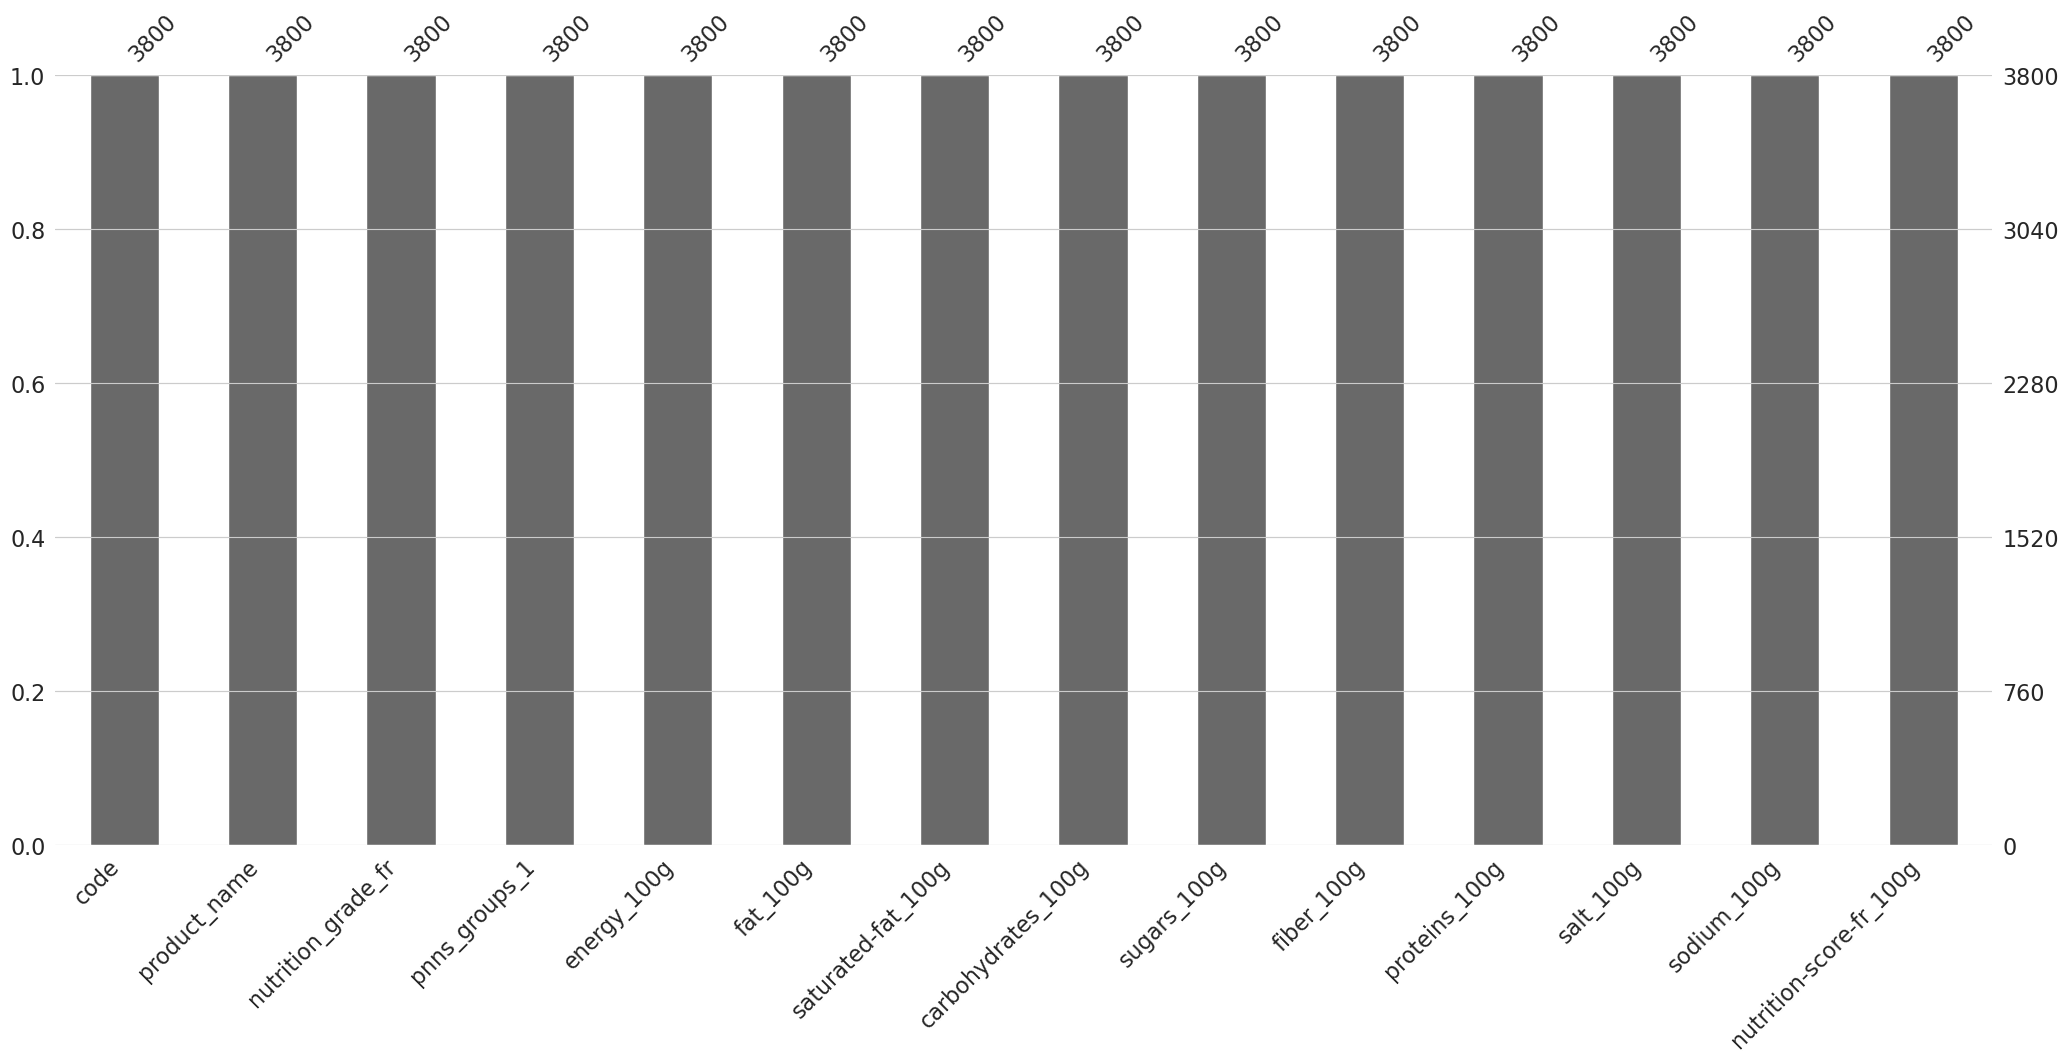

In [44]:
msno.bar(subset_products_data)

In [45]:
subset_products_data

,code,product_name,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
56376,3660140891752,Pain d'épices au,d,Sugary snacks,1289.0,13.321027,0.100000,27.203713,43.000000,2.100000,3.00,0.770000,0.303150,13.000000
53670,3596710262823,Coquillettes,d,Cereals and potatoes,1523.0,1.900000,5.365748,73.000000,13.215154,2.669168,11.50,1.201317,0.472955,8.414159
22578,3250391979448,", Crêpes pur beurre, les 10 crêpes de 30 g",e,Sugary snacks,1611.0,13.321027,12.600000,27.203713,59.600000,0.000000,7.70,1.880000,0.740157,32.000000
17342,3222475324680,Jambon Supérieur -25 % de Sel Avec Couenne,c,Fish Meat Eggs,613.0,7.000000,2.700000,0.800000,0.800000,0.000000,20.00,1.422400,0.560000,4.000000
61834,3770003725008,300G Coulis Tomate Nature Tomatoland,b,Sugary snacks,184.0,13.321027,0.000000,27.203713,8.600000,0.000000,1.50,0.410000,0.161417,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21703,3250391316465,"Choco Mix, Sticks De Chocolat & Lait En Poudre...",e,Sugary snacks,1594.0,13.321027,3.600000,27.203713,59.900000,0.000000,14.90,1.010000,0.397638,21.000000
45861,3502110006660,Tropicana pure premium orange avec pulpe 2 l,c,Beverages,201.0,0.000000,0.000000,10.000000,10.000000,0.700000,0.80,0.000000,0.000000,4.000000
46830,3542860752011,Comté 9 Mois Doux & Onctueux,d,Milk and dairy products,1735.0,34.600000,22.500000,0.000000,0.000000,2.669168,26.70,0.817000,0.321654,13.000000
38687,3347439979314,Galette Bio,d,Sugary snacks,1803.0,13.321027,15.420000,27.203713,13.200000,7.860000,11.11,0.020000,0.007874,12.000000


In [46]:
# Liste des colonnes à vérifier
columns_to_check =  ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']

# Boucle sur les colonnes
for column in columns_to_check:
    # Identifier les valeurs aberrantes
    outliers = subset_products_data[(subset_products_data[column] < 0) | (subset_products_data[column] > 100)]
    
    # Si il y a des valeurs aberrantes, imprimer les valeurs aberrantes
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)
    else:
        print(f"No outliers in {column}")
    
    print("\n")

Outliers in fat_100g:
                code              product_name nutrition_grade_fr  \
72222  8032942610032  Graine de couscous moyen                  a   

              pnns_groups_1  energy_100g  fat_100g  saturated-fat_100g  \
72222  Cereals and potatoes       1482.0     105.0                 0.3   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
72222                70.0          2.5    2.669168           12.0       0.01   

       sodium_100g  nutrition-score-fr_100g  
72222     0.003937                     -1.0  


No outliers in saturated-fat_100g


No outliers in carbohydrates_100g


No outliers in sugars_100g


No outliers in fiber_100g


No outliers in proteins_100g


No outliers in salt_100g


No outliers in sodium_100g




On remplace les valeurs aberrantes par Nan et on revérifie les valeurs aberrantes : 

In [47]:
# Boucle sur les colonnes pour identifier et supprimer les outliers
for column in columns_to_check:
    # Identifier les valeurs aberrantes
    outliers =subset_products_data[(subset_products_data[column] < 0) | (subset_products_data[column] > 100)]
    
    # Supprimer les lignes contenant des valeurs aberrantes
    subset_products_data.drop(outliers.index, inplace=True)

# Boucle sur les colonnes pour afficher les outliers après suppression
for column in columns_to_check:
    # Identifier les valeurs aberrantes
    outliers = subset_products_data[(subset_products_data[column] < 0) | (subset_products_data[column] > 100)]
    
    # Si il y a des valeurs aberrantes, afficher le DataFrame des outliers
    if not outliers.empty:
        display(outliers) 
    else:
        print(f"No outliers in {column}")

No outliers in fat_100g
No outliers in saturated-fat_100g
No outliers in carbohydrates_100g
No outliers in sugars_100g
No outliers in fiber_100g
No outliers in proteins_100g
No outliers in salt_100g
No outliers in sodium_100g


In [48]:
# Affiche le nombre total de valeurs manquantes dans chaque colonne du DataFrame.
print(subset_products_data.isnull().sum())

code                       0
product_name               0
nutrition_grade_fr         0
pnns_groups_1              0
energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
nutrition-score-fr_100g    0
dtype: int64


In [49]:
duplicates = subset_products_data[subset_products_data.duplicated()]

if len(duplicates) > 0:
    print("Notre jeu de données contient", len(duplicates), "doublon(s).")
else:
    print("Notre jeu de données ne contient pas de doublons.")

Notre jeu de données ne contient pas de doublons.


In [50]:
subset_products_data.to_csv('final_data.csv', index=False)